#### ASm6As enriched in RNA features

In [24]:
import scipy.stats as stats

feature = "/Charles/project/ASm6A/ASm6A/motif/m6A/RRACH/RRACH.bed"
# feature = "/home/galaxy/data/RBP/POSTAR/POSTAR_bed/hg19_bed/total/RBPs.bed"
feature = "/home/galaxy/project/alleleSpecific_analysis/data/riboSNitches/total_riboSNITCHES.bed"
feature = "/home/galaxy/data/splicing_sites/hg19_filtered_splice_sites.txt"
feature = "/home/galaxy/project/alleleSpecific_analysis/data/functional_fetures/miRNA/miRNA.hg19.bed"
#####
SNPsnap_dir = "/Charles/project/ASm6A/ASm6A/common_ASm6A/homer/split_region/common_ASm6A/SNPsnap/"
os.chdir(SNPsnap_dir)
asm6a = "Input_SNP.bed"
asm6a_num = int(os.popen("wc -l %s" % asm6a).read().split()[0])
overlap_asm6a=os.popen("bedtools intersect -a %s -b %s -wa|sort -u|wc -l"%(asm6a,feature)).read().split()[0]

# ratio_list = []
# for i in range(1, 101): 
i = 1
con = "Set_%d.bed" % i
con_num = int(os.popen("wc -l %s" % con).read().split()[0])
overlap_con=os.popen("bedtools intersect -a %s -b %s -wa|sort -u|wc -l"%(con,feature)).read().split()[0]
a,b,c,d = int(overlap_asm6a), int(overlap_con), asm6a_num-int(overlap_asm6a), con_num-int(overlap_con)
oddsratio,pvalue = stats.fisher_exact([[a+1,b+1], [c+1,d+1]])
#     if pvalue <= 0.05:
#         ratio_list.append(oddsratio)
#     else:
#         ratio_list.append(0)
#             print("####             ASm6A   Control")
#             print("# Enhancer         %d       %d  " % (a,b))
#             print("# Non-Enhancer     %d       %d  " % (c,d))
#             print("#############################\n\n")
# print("\t".join([str(np.mean(ratio_list))]))
print(a,b,c,d)
print(oddsratio, pvalue)

0 0 2115 2115
1.0 1.0


In [27]:
### stat overlapping number
rrach = "/Charles/project/ASm6A/ASm6A/motif/m6A/RRACH/RRACH.bed"
iboSNITCHES = "/home/galaxy/project/alleleSpecific_analysis/data/riboSNitches/total_riboSNITCHES.bed"
rbp = "/home/galaxy/data/RBP/ENCODE/20201124_2121/merged_bed/hg19/rename/union_peaks/total/total.bed"
splicing = "/home/galaxy/data/splicing_sites/hg19_filtered_splice_sites.txt"
miRNA = "/home/galaxy/project/alleleSpecific_analysis/data/functional_fetures/miRNA/miRNA.hg19.bed"
###################################

SNPsnap_dir = "/Charles/project/ASm6A/ASm6A/common_ASm6A/homer/split_region/common_ASm6A/SNPsnap/"
os.chdir(SNPsnap_dir)
asm6a = "Input_SNP.bed"
feature_list = [rrach, iboSNITCHES, rbp, splicing, miRNA]
name_list    = ['rrach', 'iboSNITCHES', 'rbp', 'splicing', 'miRNA']
for i in range(len(feature_list)):
    feature = feature_list[i]
    name = name_list[i]
    overlap_asm6a=os.popen("bedtools intersect -a %s -b %s -wa|sort -u|wc -l"%(asm6a,feature)).read().split()[0]
    print("%s\t%s" % (name, overlap_asm6a))

rrach	224
iboSNITCHES	13
rbp	373
splicing	0
miRNA	16


#### RBP enrichment analysis

In [7]:
from scipy import stats

os.chdir("/Charles/project/ASm6A/ASm6A/control/SNPsnap/") # kidney_IP_3/SNPsnap/
dir_list = [x for x in glob.glob("*") if os.path.isdir(x)]
# asm6a_dir = "/Charles/project/ASm6A/ASm6A/"
# asm6a_list = glob.glob("%s/*.bed" % asm6a_dir)
# con_dir = "/Charles/project/ASm6A/ASm6A/control/"
# rbp_dir = "/home/galaxy/data/RBP/POSTAR/POSTAR_bed/hg19_bed/"
rbp_dir = "/home/galaxy/data/RBP/ENCODE/20201124_2121/merged_bed/hg19/rename/union_peaks/"
rbp_list = glob.glob("%s/*.bed" % rbp_dir)
#############################################################
# for asm6a in asm6a_list:
for i_dir in dir_list:
    asm6a = "%s/SNPsnap/Input_SNP.bed" % i_dir
    if os.path.exists(asm6a):
        con = "%s/SNPsnap/Set_1.bed" % i_dir
    #     sample = os.path.basename(asm6a)
    #     con = os.path.join(con_dir, sample)
        asm6a_num = int(os.popen("wc -l %s" % asm6a).read().split()[0])
        con_num = int(os.popen("wc -l %s" % con).read().split()[0])
        for rbp in rbp_list:
    #         rbp = "/home/galaxy/data/RBP/POSTAR/POSTAR_bed/FUS_brain_hg19.bed"
            overlap_asm6a=os.popen("bedtools intersect -a %s -b %s -wa|sort -u|wc -l"%(asm6a,rbp)).read().split()[0]
            overlap_con=os.popen("bedtools intersect -a %s -b %s -wa|sort -u|wc -l"%(con,rbp)).read().split()[0]
            a,b,c,d = int(overlap_asm6a), int(overlap_con), asm6a_num-int(overlap_asm6a), con_num-int(overlap_con)
            oddsratio,pvalue = stats.fisher_exact([[a+1,b+1], [c+1,d+1]])
            #     print("####          ASm6A   Control")
            #     print("# GWAS         a       b 
            #     print("# Non-GWAS     c       d 
            if pvalue < 0.05:
                print("\t".join([os.path.basename(i_dir),os.path.basename(rbp),str(pvalue),str(oddsratio),str(a),str(b)]))

muscle_IP_5	BCLAF1.bed	0.02771530174884134	2.2980400665364864	24	10
muscle_IP_5	RBM15.bed	6.453683493185114e-06	6.53824	31	4
muscle_IP_5	AKAP1.bed	7.186934451670526e-06	5.793803418803419	33	5
muscle_IP_5	UPF1.bed	1.076599250227938e-08	3.535179017485429	80	23
muscle_IP_5	FXR2.bed	0.02124489312463049	9.05655930871956	8	0
muscle_IP_4	AKAP1.bed	0.008463438858877324	2.824561403508772	24	8
muscle_IP_4	UCHL5.bed	0.023096076213735862	2.4353312302839116	23	9
muscle_IP_4	UPF1.bed	7.06611218192038e-05	2.7996742671009773	53	19
muscle_IP_4	EIF3H.bed	0.03863036524014449	8.057911065149948	7	0
Trachea-5-3	BCLAF1.bed	0.010856281175902632	10.382978723404255	9	0
Trachea-5-3	UCHL5.bed	0.019266614457079098	4.5201149425287355	12	2
Trachea-5-3	UPF1.bed	0.027926541074077445	3.6515151515151514	13	3
Trachea-5-3	IGF2BP3.bed	0.03734952534544001	8.236286919831224	7	0
brain_IP_1	UPF1.bed	0.03703095240779142	1.9764577747989276	30	15
Cerebrum-5-3	UPF1.bed	0.006642531590912189	5.228136882129277	14	2
Heart_2	DDX55.bed	

Thyroid_gland-5-3	RBM15.bed	0.035649544044766474	5.220994475138122	9	1
Thyroid_gland-5-3	UPF1.bed	0.016394067012352867	3.984375	14	3
Stomach-5-3	UCHL5.bed	0.036555778075722016	8.352201257861635	7	0
heart_IP_2	RBM15.bed	0.006489942948921492	3.0583232077764277	23	7
heart_IP_2	AKAP1.bed	0.00382030948817393	4.072551390568319	19	4
heart_IP_2	UPF1.bed	1.9540769382725972e-05	3.495625	46	13
heart_IP_2	EIF3H.bed	0.0343716945542657	4.04311377245509	11	2
heart_IP_2	SLTM.bed	0.021968223028151306	5.559210526315789	10	1
heart_IP_2	FXR2.bed	0.0009318322750277119	14.218487394957982	13	0
heart_IP_2	IGF2BP2.bed	0.021968223028151306	5.559210526315789	10	1
lung_IP_4	DDX3X.bed	0.0002591815489858459	7.1096605744125325	20	2
lung_IP_4	RBM15.bed	0.0008523964254997245	4.672188317349607	22	4
lung_IP_4	AKAP1.bed	0.010722317907430251	2.6363636363636362	25	9
lung_IP_4	UPF1.bed	3.866601923270332e-05	2.931239388794567	53	18
lung_IP_4	FUS.bed	0.01153575182144326	10.077586206896552	9	0
lung_IP_4	IGF2BP1.bed	0.030257138

In [1]:
#### using "common ASm6A" to do enrichment analysis
import scipy.stats as stats

# SNPsnap_dir = "/Charles/project/ASm6A/ASm6A/common_ASm6A/homer_anno/split_region/common_ASm6A/SNPsnap/"
# SNPsnap_dir = "/Charles/project/ASm6A/ASm6A/common_ASm6A/totaltissues/homer_anno/split_region/common/SNPsnap/"
SNPsnap_dir = "/Charles/project/ASm6A/ASm6A/common_ASm6A/totaltissues/homer_anno_100%/SNPsnap/ASm6A/SNPsnap/"
os.chdir(SNPsnap_dir)
#
asm6a = "Input_SNP.bed"
asm6a_num = int(os.popen("wc -l %s" % asm6a).read().split()[0])
#
# rbp_dir = "/home/galaxy/data/RBP/POSTAR/POSTAR_bed/hg19_bed/"
rbp_dir = "/home/galaxy/data/RBP/ENCODE/20201124_2121/merged_bed/hg19/rename/union_peaks/"
# rbp_dir = "/home/cjr/caoshuo/data/oRNAment/all_RBPs/hg19/"
rbp_list = glob.glob("%s/*.bed" % rbp_dir)
for rbp in rbp_list:
#     rbp = "/home/galaxy/project/alleleSpecific_analysis/data/RBP/ENCODE/eCLIP/FUS/K562/repet1_2_hg19.bed"
#     rbp = "/home/galaxy/project/alleleSpecific_analysis/data/RBP/ENCODE/eCLIP/FUS/HepG2/repet1_2_hg19.bed"
#     rbp = "/home/galaxy/project/alleleSpecific_analysis/data/RBP/ENCODE/eCLIP/FUS/combine/union_hg19.bed"
#     rbp = "/home/galaxy/data/RBP/POSTAR/POSTAR_bed/FUS_brain_hg19.bed"
#     rbp = "/home/galaxy/data/RBP/POSTAR/POSTAR_bed/hg19_bed/FUS.bed"
#     rbp = "/home/galaxy/data/RBP/POSTAR/POSTAR_bed/hg19_bed/backup/FUS.bed"
    ratio_list = []
    for i in range(1, 101): 
    #     i = 1
        con = "Set_%d.bed" % (i)
        con_num = int(os.popen("wc -l %s" % con).read().split()[0])
        overlap_asm6a=os.popen("bedtools intersect -a %s -b %s -wa|sort -u|wc -l"%(asm6a,rbp)).read().split()[0]
        overlap_con=os.popen("bedtools intersect -a %s -b %s -wa|sort -u|wc -l"%(con,rbp)).read().split()[0]
        a,b,c,d = int(overlap_asm6a), int(overlap_con), asm6a_num-int(overlap_asm6a), con_num-int(overlap_con)
        oddsratio,pvalue = stats.fisher_exact([[a+1,b+1], [c+1,d+1]])
        if pvalue <= 0.05:
            ratio_list.append(oddsratio)
        else:
            ratio_list.append(0)
    #         print("####             ASm6A   Control")
    #         print("# Enhancer         %d       %d  " % (a,b))
    #         print("# Non-Enhancer     %d       %d  " % (c,d))
    #         print("#############################\n\n")
    #     print(i, os.path.basename(rbp), oddsratio, pvalue, a,b,c,d)
    print("\t".join([os.path.basename(rbp), str(np.mean(ratio_list))]))

SF3B4.bed	0.0
DDX3X.bed	0.03518776824034335
MATR3.bed	0.0
BCLAF1.bed	0.1685319211532804
STAU2.bed	0.0
SRSF9.bed	0.0
G3BP1.bed	0.0
CPEB4.bed	0.0
ZC3H8.bed	0.0
SDAD1.bed	0.0
TARDBP.bed	0.0034580891493518028
TROVE2.bed	0.0
HNRNPK.bed	0.0
HNRNPA1.bed	0.0
SAFB2.bed	0.0
SAFB.bed	0.0
HNRNPC.bed	0.0
HNRNPM.bed	0.0
TBRG4.bed	0.0
ZRANB2.bed	0.0
RBM15.bed	4.405642551892552
GEMIN5.bed	0.0
SND1.bed	0.0
DDX6.bed	0.0
FKBP4.bed	0.0
EFTUD2.bed	0.0
TIAL1.bed	0.0
DHX30.bed	0.0
EIF3D.bed	0.0
PABPN1.bed	0.3514989293361884
PTBP1.bed	0.0
RPS3.bed	0.0
EXOSC5.bed	0.0
PRPF8.bed	0.0033155365723438334
AKAP1.bed	4.039353821120925
UCHL5.bed	2.1799142474163826
HNRNPU.bed	0.0
PPIL4.bed	0.0
SFPQ.bed	0.0
DGCR8.bed	0.0
WDR3.bed	0.0
DDX55.bed	0.0
DKC1.bed	0.0
METAP2.bed	0.0
UPF1.bed	3.302467111675457
PABPC4.bed	0.0
CSTF2.bed	0.0
DDX51.bed	0.0
PUM1.bed	0.0
POLR2G.bed	0.0
PCBP1.bed	1.4925120514193893
APOBEC3C.bed	0.0
U2AF1.bed	0.0
NOL12.bed	0.0
FTO.bed	0.0
BUD13.bed	0.0033155365723438334
BCCIP.bed	0.0
SUB1.bed	0.0
DDX52.be

#### overlap with WJK and MTC cofactors

In [2]:
#### 
# compare the RBP overlapping results with known RBP database
# WJK
# METTL3-COMPLEX 
complex_rbps = "/home/galaxy/project/alleleSpecific_analysis/data/interaction/complex_intereaction.RBPs.txt"
wjk_rbps = "/home/galaxy/project/alleleSpecific_analysis/data/RBP/WJK_RBPs.txt"

# enriched_rbps = ["XPO5", "EFTUD2", "U2AF2", "ILF3", "SSB", "ELAVL1", "RPS5", "HNRNPC", "RBFOX2", "NONO", "WDR33", "CSTF2", "PTBP1", "AKAP8L", "HNRNPH1", "FBL", "CSTF2T", "CELF2", "NKRF", "AGGF1", "CPSF1", "SRSF7", "GTF2F1", "CPSF3", "EWSR1", "TBRG4", "CPSF4", "SF3B1", "TARDBP", "DROSHA", "TROVE2", "ZRANB2", "FTO", "RBM22", "HNRNPK", "DGCR8", "DHX30", "TAF15", "GRSF1", "FUS", "SAFB2", "FAM120A", "NOP58", "DDX59", "YWHAG", "NCBP2", "ALKBH5", "FIP1L1", "EIF3B", "AARS", "SERBP1", "MBNL2", "FASTKD2", "ZC3H7B", "EIF3A", "RTCB", "NOL12", "PCBP2", "TIA1", "GEMIN5", "SRSF1", "MTPAP", "EIF3G", "SLTM", "NUDT21", "MOV10", "FXR1", "SRRM4", "TIAL1", "RBM47", "EIF3D", "PUM2", "BUD13", "CPSF6", "LIN28B", "SRSF9", "LSM11", "CPSF7", "DDX6", "LIN28A", "NCBP3", "SUB1", "DDX3X", "RBM15B", "ATXN2", "EIF4A3", "DDX24", "IGF2BP3", "CAPRIN1", "TRA2A", "YTHDF3", "IGF2BP2", "LARP4", "YTHDC1", "IGF2BP1", "METAP2", "UPF1", "FMR1", "PPIG", "FXR2", "RPS3", "DDX55", "YBX3", "UCHL5", "SND1", "GRWD1", "ZNF622", "RBM15", "EIF3H", "YTHDF2", "YTHDF1"]
# enriched_rbps = ["YTHDF1", "UCHL5", "SND1", "YTHDF2", "ZNF622", "GRWD1", "EIF3H", "FXR2", "YBX3", "DDX55", "PPIG", "RPS3", "RBM15", "UPF1", "LARP4", "IGF2BP1", "EIF4A3", "FMR1", "METAP2", "TRA2A", "SUB1", "IGF2BP3", "YTHDF3", "IGF2BP2", "DDX24", "LSM11", "LIN28A", "ATXN2", "CAPRIN1", "NCBP3", "YTHDC1", "DDX6", "NOL12", "MOV10", "RBM15B", "PUM2", "DDX3X", "FXR1", "MBNL2", "SRRM4", "SRSF9", "RBM47", "EIF3D", "CPSF7", "TIAL1", "CPSF6", "LIN28B", "SERBP1", "BUD13", "RTCB", "NUDT21", "EIF3G", "GRSF1", "TIA1", "ZC3H7B", "MTPAP", "NOP58", "SRSF1", "ALKBH5", "GEMIN5", "YWHAG", "FUBP3", "FUS", "FAM120A", "EIF3B", "PCBP2", "XRCC6", "CPSF1", "FASTKD2", "SLTM", "AARS", "FIP1L1", "EIF3A", "TAF15", "ZRANB2", "HNRNPK", "DHX30", "FTO", "CPSF3", "AKAP8L", "SAFB2", "NCBP2", "TARDBP", "DGCR8", "AGGF1", "CELF2", "DROSHA", "EWSR1", "SF3B1", "CPSF4", "RBFOX2", "FBL", "TBRG4", "RBM22", "XPO5", "PTBP1", "SSB", "CSTF2T", "TNRC6A", "NONO", "TROVE2", "RPS5", "GTF2F1", "LARP7", "CSTF2", "SF3B4", "DDX59", "PRPF8", "HNRNPC", "NKRF", "WDR33", "CPSF2", "SRSF7", "U2AF2", "ELAVL1", "EFTUD2", "HNRNPH1", "HNRNPU", "XRN2", "ILF3", "SMNDC1"]
# enriched_rbps = ["SRSF9", "LSM11", "AKAP8L", "EIF3G", "SLTM", "YTHDF1", "ZRANB2", "HNRNPK", "YTHDF3", "RBM15B", "RBM15", "NONO", "LARP4", "SERBP1", "AARS", "NCBP2", "AGGF1", "YTHDF2", "RBFOX2", "XPO5", "DROSHA", "RPS5", "GTF2F1", "EIF3D", "SUB1", "TRA2A", "GEMIN5", "RBM22", "DDX55", "DDX3X", "YBX3", "METAP2", "YTHDC1", "RPS3", "PCBP2", "EIF3H", "SAFB2", "UCHL5", "NCBP3", "FTO", "SRRM4", "CPSF1", "DGCR8", "NOL12", "NUDT21", "DDX6", "EIF4A3", "GRSF1", "FIP1L1", "UPF1", "ZNF622", "IGF2BP1", "FASTKD2", "GRWD1", "CPSF6", "TAF15", "FXR2", "SRSF1", "YWHAG", "SF3B4", "LIN28A", "PTBP1", "DHX30", "CPSF7", "EIF3B", "FUS", "FAM120A", "SND1", "SF3B1", "CAPRIN1", "IGF2BP2", "FMR1", "ATXN2", "LIN28B", "CPSF3", "IGF2BP3", "NOP58", "HNRNPC", "MTPAP", "TARDBP", "PPIG", "BUD13", "CSTF2", "MOV10", "EWSR1", "CSTF2T", "TNRC6A", "TBRG4", "U2AF2", "RTCB", "DDX24", "PUM2", "PRPF8", "CELF2", "EFTUD2", "XRCC6", "CPSF2"]
# enriched_rbps = ['FUS', 'RBM15', 'SLTM', 'TRA2A', 'HLTF', 'AKAP1', 'UPF1', 'IGF2BP1', 'CSTF2T', 'YBX3', 'ZNF622', 'EIF3H', 'ZC3H11A', 'UCHL5']
# enriched_rbps = ['YTHDF2', 'RBM15', 'YTHDF1', 'FMR1', 'ATXN2', 'EIF3H', 'YTHDC1', 'NUDT21', 'CPSF7', 'HNRNPC', 'DDX55', 'YTHDF3', 'TARDBP', 'FIP1L1', 'UPF1', 'IGF2BP1', 'SLTM', 'FXR2', 'UCHL5', 'TRA2A', 'CPSF6', 'DDX3X', 'AARS', 'DDX6', 'GRWD1', 'GEMIN5', 'LARP4', 'YBX3', 'LSM11', 'METAP2', 'AGGF1', 'CSTF2T', 'ZC3H7B', 'CSTF2', 'RBM15B', 'SRSF1', 'FUS', 'ZNF622']
# enriched_rbps = ["FUS", "RBM15", "SLTM", "AKAP1", "UPF1", "TRA2A", "DDX6", "UCHL5", "PUM2", "LARP4", "DDX55", "PCBP1", "HLTF", "LSM11", "DDX3X", "EIF3H", "SRSF1", "IGF2BP2"]
enriched_rbps = ["FUS", "RBM15", "AKAP1", "UPF1", "SLTM", "UCHL5", "PUM2", "PCBP1", "CSTF2T", "IGF2BP2", "TRA2A", "EIF3H"]
com_list = pd.read_table(complex_rbps, header=None).iloc[:, 0].tolist()
wjk_list = pd.read_table(wjk_rbps, header=None).iloc[:, 0].tolist()
print(len(enriched_rbps), len(com_list), len(wjk_list))
com_inter = set(enriched_rbps).intersection(set(com_list))
wjk_inter = set(enriched_rbps).intersection(set(wjk_list))
print(len(com_inter), len(wjk_inter))
print(com_inter)
print(wjk_inter)

#### calculate pvalue online (overlap)
# http://nemates.org/MA/progs/overlap_stats.cgi

12 522 32
4 3
{'PCBP1', 'EIF3H', 'RBM15', 'FUS'}
{'TRA2A', 'UPF1', 'CSTF2T'}


/home/galaxy/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/galaxy/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/galaxy/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


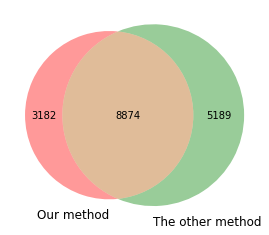

In [1]:
## plot
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# 
# result_dir = "/Charles/project/ASm6A/plot/"
# #figure, axes = plt.subplots(4,4)
# venn2([set(enriched_rbps), set(com_list)], set_labels=('Enriched RBPs', 'Interacted with COMPLEX'))
# #plt.show()
# plt.rcParams["font.family"] = "Times New Roman"
# plt.savefig('%s/Fig5d.pdf'%result_dir, dpi=600)
# plt.close()
###
#figure, axes = plt.subplots(4,4)
result_dir = "/Charles/project/ASm6A/ASm6A_renlab/z_comparision/compare_results/"
file_1 = "/Charles/project/ASm6A/ASm6A/total.terms.txt"
file_2 = "/Charles/project/ASm6A/ASm6A_renlab/z_comparision/restrict_to_samePeak/total.terms.txt"
enriched_rbps = pd.read_table(file_1, header=None).iloc[:,0].tolist()
wjk_list = pd.read_table(file_2, header=None).iloc[:,0].tolist()
venn2([set(enriched_rbps), set(wjk_list)], set_labels=('Our method', 'The other method'))
# plt.show()
plt.rcParams["font.family"] = "Times New Roman"
plt.savefig('%s/Overlap.pdf'%result_dir, dpi=600)

#### motifbreakR

In [3]:
from scipy import stats
## RUN motifbreakR first.
## /Charles/project/ASm6A/ASm6A/motifbreakR/
###########################################  Parse results ########################################
os.chdir("/Charles/project/ASm6A/ASm6A/motifbreakR/")
asm6a_dir = "/Charles/project/ASm6A/ASm6A/"
# asm6a_dir = "/Charles/project/ASm6A/Hypothesis_test/ASm6A/sigpv005/contained_m6A/highFC/rename/"
rbp = "/home/galaxy/project/alleleSpecific_analysis/results/ASm6A_addZr/motifbreakR/RBP_list.txt"
rbp_list = pd.read_table(rbp, header=None).iloc[:,0].tolist()
#####################################################################################################
asm6a_list = glob.glob("%s/*.bed"%asm6a_dir)
for asm6a in asm6a_list:
    prefix = os.path.basename(asm6a).split(".bed")[0]
#     if prefix == "Cerebellum_3":
    df_asm6a = pd.read_table(asm6a)
    df_asm6a['term'] = df_asm6a.iloc[:,0] + ":" + df_asm6a.iloc[:,2].astype(str)
    # df_asm6a['ASm6A_alleleDiff'] = df_asm6a.iloc[:,5] - df_asm6a.iloc[:,4]
    df_asm6a['ASm6A_alleleDiff'] = np.log2(df_asm6a.iloc[:,5]/df_asm6a.iloc[:,4]) ####
    affinity = "%s.rs.results.txt" % prefix
    if os.path.exists(affinity): ##
        df_aff = pd.read_table(affinity)
        for rbp in rbp_list:
#             if rbp == "FUS":
            if rbp in ["SRSF9","TAF15", "RBM15", "RBM15B", "FUS"]:
                df_sub = df_aff[df_aff['providerName'].str.contains(rbp.upper())]
                df_sub['term'] = df_sub['seqnames'] + ":" + df_sub['end'].astype(str)
                df_sub = df_sub[['term', 'alleleDiff', 'effect']]
                # df_sub = df_sub[df_sub['effect'] == "strong"] ###################
                df = df_sub.merge(df_asm6a, on="term", how="left")
                df = df[['term','alleleDiff','ASm6A_alleleDiff','effect']].dropna()
                df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
                if len(df) >= 3:
                    coef, pvalue = stats.pearsonr(df['alleleDiff'].tolist(), df['ASm6A_alleleDiff'].tolist())
                    if (abs(coef) >= 0.5) and (pvalue <= 0.05):
                        df_strong = df[df['effect'] == "strong"]
                        print(prefix, rbp, coef, pvalue, len(df), len(df_strong))
                        print(df)

/home/galaxy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/galaxy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log2


Adrenal_gland-1-1 SRSF9 -0.9860704454077447 0.013929554592255311 4 3
              term  alleleDiff  ASm6A_alleleDiff  effect
0   chr15:86124968   -1.350041          0.825321  strong
1    chr8:23118304    0.943519         -0.219169  strong
2  chr12:115121189    0.442097          0.194945    weak
3   chr15:67483276    1.639152         -0.354301  strong


/home/galaxy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


Hypothalamus-5-3 TAF15 -0.9998153285004067 0.012234937140627736 3 2
            term  alleleDiff  ASm6A_alleleDiff  effect
0  chr7:65422470   -1.639152          1.327781  strong
1  chr20:4763299    0.454298         -2.062888    weak
2  chr7:65422471   -1.639152          1.253353  strong
heart_IP_2 TAF15 -0.9769639662343464 0.0007898761398661428 6 6
             term  alleleDiff  ASm6A_alleleDiff  effect
1  chr14:77492351    1.639152         -0.680382  strong
2  chr10:75407290   -1.639152          1.234206  strong
3  chr22:26164413   -1.639152          1.437580  strong
4   chr8:37699195   -1.639152          1.974909  strong
5  chr18:56246442    1.639152         -0.750641  strong
6  chr20:31022443   -1.639152          1.388220  strong
heart_IP_2 FUS 0.898713706142079 0.03810212599783468 5 5
             term  alleleDiff  ASm6A_alleleDiff  effect
0   chr19:3122380    1.639152          0.489204  strong
1   chr17:7366651    1.639152          0.316284  strong
2  chr19:48984178   -1.639152   

In [ ]:
### single file (common ASm6A)
os.chdir("/home/galaxy/project/alleleSpecific_analysis/results/ASm6A_addZr/motifbreakR/")
rbp = "RBP_list.txt"
rbp_list = pd.read_table(rbp, header=None).iloc[:,0].tolist()
#####################################################################################################
asm6a = "../common_ASm6A/common_ASm6A_quantitative.txt"
df_asm6a = pd.read_table(asm6a)
df_asm6a['chr'] = df_asm6a.iloc[:,0].str.split(":").str[0]
df_asm6a['pos'] = df_asm6a.iloc[:,0].str.split(":").str[1]
df_asm6a['term'] = df_asm6a['chr'] + ":" + df_asm6a["pos"].astype(str)
df_asm6a['ASm6A_alleleDiff'] = np.log2(df_asm6a["ASm6a_altFPKM_mean"]/df_asm6a['ASm6a_refFPKM_mean'])
##
affinity = "motifbreakR_commonASm6A_results.txt"
df_aff = pd.read_table(affinity)
for rbp in rbp_list:
    df_sub = df_aff[df_aff['providerName'].str.contains(rbp.upper())]
    df_sub['term'] = df_sub['seqnames'] + ":" + df_sub['end'].astype(str)
    df_sub = df_sub[['term', 'alleleDiff', 'effect']]
    ##
    df = df_sub.merge(df_asm6a, on="term", how="left")
    df = df[['term','alleleDiff','ASm6A_alleleDiff','effect']].dropna()
    print(len(df))
    if len(df) >= 4:
        coef, pvalue = stats.pearsonr(df['alleleDiff'].tolist(), df['ASm6A_alleleDiff'].tolist())
#         if abs(coef) >= 0.5:
        print(prefix, rbp)
        print(coef, pvalue)

In [2]:
#### only for FUS
from scipy import stats

os.chdir("/Charles/project/ASm6A/shFUS/mapping/human/motifbreakR/")
sample_list = glob.glob("*.results.txt")
asm6a_dir = "/Charles/project/ASm6A/shFUS/mapping/human/uniq_bam/count/Hypothesis/Fisher/sig/"
#####################################################################################################
for sample in sample_list:
#     asm6a = "../common_ASm6A/common_ASm6A_quantitative.txt"
    asm6a = "%s/%s.bed" % (asm6a_dir, sample.split(".results.txt")[0])
#     df_asm6a = pd.read_table(asm6a)
#     df_asm6a['chr'] = df_asm6a.iloc[:,0].str.split(":").str[0]
#     df_asm6a['pos'] = df_asm6a.iloc[:,0].str.split(":").str[1]
    df_asm6a = pd.read_table(asm6a, header=None)
    df_asm6a['chr'] = df_asm6a.iloc[:,0]
    df_asm6a['pos'] = df_asm6a.iloc[:,2]
    df_asm6a['ASm6a_refFPKM_mean'] = df_asm6a.iloc[:,4]
    df_asm6a["ASm6a_altFPKM_mean"] = df_asm6a.iloc[:,5]
    df_asm6a['term'] = df_asm6a['chr'] + ":" + df_asm6a["pos"].astype(str)
    df_asm6a['ASm6A_alleleDiff'] = np.log2(df_asm6a['ASm6a_altFPKM_mean']/df_asm6a["ASm6a_refFPKM_mean"])
    ##
    affinity = sample
    df_aff = pd.read_table(affinity)
    # df_sub = df_aff[df_aff['providerName'].str.contains(rbp.upper())]
    df_sub = df_aff
    df_sub['term'] = df_sub['seqnames'] + ":" + df_sub['end'].astype(str)
    df_sub = df_sub[['term', 'alleleDiff', 'effect']]
    ##
    df = df_sub.merge(df_asm6a, on="term", how="left")
    df = df[['term','alleleDiff','ASm6A_alleleDiff','effect']].dropna()
    print(len(df))
#     if len(df) >= 4:
    coef, pvalue = stats.pearsonr(df['alleleDiff'].tolist(), df['ASm6A_alleleDiff'].tolist())
    #         if abs(coef) >= 0.5:
#     print(prefix, rbp)
    print(sample.split(".results.txt")[0], coef, pvalue)

/home/galaxy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log2


5
wt1 0.4675997418906418 0.42710352564905407
3
kd2-2 -0.8430025232062356 0.3615716648468135
5
kd2-1 0.12492705410360949 0.8413526493363551
3
kd1-1 nan nan
4
wt2 0.4517525918411081 0.548247408158892
3
kd1-2 0.30514845189743456 0.8025878294633493


/home/galaxy/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [10]:
#### 90 samples enriched results 
from collections import Counter

rbps = ["AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "AKAP1", "BCLAF1", "BCLAF1", "BCLAF1", "BCLAF1", "BCLAF1", "BCLAF1", "BCLAF1", "CSTF2T", "DDX3X", "DDX3X", "DDX55", "DDX55", "DDX55", "EIF3H", "EIF3H", "EIF3H", "FUS", "FXR2", "FXR2", "FXR2", "FXR2", "FXR2", "FXR2", "FXR2", "FXR2", "GRWD1", "GRWD1", "GRWD1", "GRWD1", "GRWD1", "GRWD1", "HLTF", "IGF2BP1", "IGF2BP1", "IGF2BP1", "IGF2BP1", "IGF2BP1", "IGF2BP1", "IGF2BP2", "IGF2BP2", "IGF2BP2", "IGF2BP2", "IGF2BP2", "IGF2BP2", "IGF2BP2", "IGF2BP3", "LARP4", "LSM11", "PABPN1", "PCBP2", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "RBM15", "SLTM", "SLTM", "SLTM", "SLTM", "SLTM", "SRSF1", "SRSF1", "TRA2A", "UCHL5", "UCHL5", "UCHL5", "UCHL5", "UCHL5", "UCHL5", "UCHL5", "UCHL5", "UCHL5", "UCHL5", "UCHL5", "UCHL5", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "UPF1", "YBX3", "YBX3", "YBX3", "YBX3", "YBX3", "ZNF622"]
count = Counter(rbps)
print(count)

for rbp, c in count.items():
    print(rbp, c)

Counter({'UPF1': 52, 'AKAP1': 36, 'RBM15': 36, 'UCHL5': 12, 'FXR2': 8, 'BCLAF1': 7, 'IGF2BP2': 7, 'GRWD1': 6, 'IGF2BP1': 6, 'SLTM': 5, 'YBX3': 5, 'DDX55': 3, 'EIF3H': 3, 'DDX3X': 2, 'SRSF1': 2, 'CSTF2T': 1, 'FUS': 1, 'HLTF': 1, 'IGF2BP3': 1, 'LARP4': 1, 'LSM11': 1, 'PABPN1': 1, 'PCBP2': 1, 'TRA2A': 1, 'ZNF622': 1})
AKAP1 36
BCLAF1 7
CSTF2T 1
DDX3X 2
DDX55 3
EIF3H 3
FUS 1
FXR2 8
GRWD1 6
HLTF 1
IGF2BP1 6
IGF2BP2 7
IGF2BP3 1
LARP4 1
LSM11 1
PABPN1 1
PCBP2 1
RBM15 36
SLTM 5
SRSF1 2
TRA2A 1
UCHL5 12
UPF1 52
YBX3 5
ZNF622 1


In [1]:
#### only for FUS
from scipy import stats

RBP = "FUS"
os.chdir("/Charles/project/ASm6A/ASm6A/corrRBP/motifbreakR/results/")
sample_list = glob.glob("*.results.txt")
asm6a_dir = "/Charles/project/ASm6A/ASm6A/"
###
result_file = "/Charles/project/ASm6A/ASm6A/corrRBP/motifbreakR/FUS_related_ASm6As/totalSamples.txt"
#####################################################################################################
df_list = []
for sample in sample_list:
    asm6a = "%s/%s.bed" % (asm6a_dir, sample.split(".rs.results.txt")[0])
    df_asm6a = pd.read_table(asm6a, header=None)
    df_asm6a['chr'] = df_asm6a.iloc[:,0]
    df_asm6a['pos'] = df_asm6a.iloc[:,2]
    df_asm6a['ASm6a_refFPKM_mean'] = df_asm6a.iloc[:,4]
    df_asm6a["ASm6a_altFPKM_mean"] = df_asm6a.iloc[:,5]
    df_asm6a['mutation'] = df_asm6a.iloc[:,3].str.split(";").str[0]
    df_asm6a['term'] = df_asm6a['chr'] + ":" + df_asm6a["pos"].astype(str)
    df_asm6a['ASm6A_alleleDiff'] = np.log2(df_asm6a['ASm6a_altFPKM_mean']/df_asm6a["ASm6a_refFPKM_mean"])
    ##
    affinity = sample
    df_aff = pd.read_table(affinity)
    df_sub = df_aff[df_aff['providerName'].str.contains(RBP)]
    df_sub['term'] = df_sub['seqnames'] + ":" + df_sub['end'].astype(str)
    df_sub = df_sub[['term', 'alleleDiff', 'effect']]
    ##
    df = df_sub.merge(df_asm6a, on="term", how="left")
    df = df[['term','mutation','alleleDiff','ASm6A_alleleDiff','effect']].dropna()
#     print(df.head())
    df_list.append(df)
df = pd.concat(df_list)
df.to_csv(result_file, sep="\t", index=False)

/home/galaxy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log2
/home/galaxy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [3]:
## pick out positive correlation
os.chdir("/Charles/project/ASm6A/ASm6A/corrRBP/motifbreakR/FUS_related_ASm6As/")
in_file = "totalSamples.txt"
df = pd.read_table(in_file)
df.head()
df['tmp'] = df['alleleDiff'] * df['ASm6A_alleleDiff']
df_pos = df[df['tmp'] > 0]
print(len(df_pos))
del df_pos['tmp']
df_pos.to_csv("totalSamples_positive.txt", sep="\t", index=False)

90


In [8]:
## txt2bed
df = pd.read_table("totalSamples_positive.txt")
print(df.head())
df['chr'] = df['term'].str.split(":").str[0]
df['pos'] = df['term'].str.split(":").str[1].astype(int)
df['start'] = df['pos'] - 1
df[['chr','start','pos','mutation']].drop_duplicates().to_csv("totalSamples_positive.bed", sep="\t", header=False, index=False)

             term mutation  alleleDiff  ASm6A_alleleDiff  effect
0  chr9:139391543      C>T    1.639152          0.980863  strong
1   chr19:3122380      T>C    1.639152          0.805378  strong
2   chr19:3122380      T>C    1.639152          1.421367  strong
3    chr7:5427517      G>A    1.639152          0.800691  strong
4  chr4:140810637      C>T   -1.639152         -2.390234  strong
